In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
import pickle

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [3]:
data = pd.read_pickle('../input/hf_data')

In [4]:
data.head()

,grid,tline_1,tline_2,substation1,substation2,substation3,substation4,6010,6014,6011,...,85694558,1182224566,2055472870,650018053,2055472870,1221247069,1824904740,838391054,1833543864,258147159
2020-02-12 20:05:00+08:00,5661.15,3240.70,2420.45,2229.26,1011.44,2392.96,27.49,1587.60,641.66,800.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12 20:10:00+08:00,6744.40,4073.04,2671.36,2872.01,1201.03,2652.16,19.20,1919.45,952.56,925.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12 20:15:00+08:00,7133.07,4145.87,2987.20,3054.38,1091.49,2966.00,21.20,1696.12,1358.26,836.98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12 20:20:00+08:00,6402.32,3489.96,2912.36,2503.56,986.40,2890.57,21.79,1437.91,1065.65,760.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-12 20:25:00+08:00,5783.29,3095.92,2687.37,2195.65,900.27,2662.89,24.48,1267.02,928.63,705.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
len(data)

82404

In [11]:
series = data['grid'][0:50000].values
time = data.index[0:50000].values

split_time = int(50000 * 0.7)
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [9]:
with open('../results/forecast_region', 'rb') as f:
    forecast = pickle.load(f)

In [10]:
forecast

array([9920.382, 9920.382, 9920.382, ..., 9920.381, 9920.381, 9920.381],
      dtype=float32)

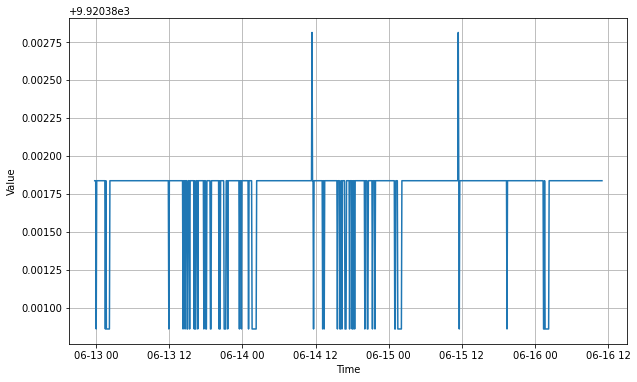

In [17]:
plt.figure(figsize=(10, 6))

# plot_series(time_valid, x_valid)
plot_series(time_valid[0:1000], forecast[0:1000])